# Demand Analysis Exercise

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA

### Loading and reading dataset

In [5]:
data = pd.read_csv("df.csv", index_col='DATE', parse_dates=True)

In [7]:
data.head(20)

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY
DATE,,,,,,
2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919
2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074
2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901
2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696
2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412
2020-06-01,3.210040,2.712150,122.889549,26.707138,1896.201439,28.262608
2020-07-01,3.361192,2.852747,124.142663,24.776800,2111.740211,39.313434
2020-08-01,3.351726,2.849279,124.602510,23.755613,1934.702106,8.617363
2020-09-01,3.553568,3.057332,125.818903,11.625787,1968.907194,27.060201


### Checking the shape of the data. There are 100 observations and 6 columns.

In [10]:
data.shape

(100, 6)

### There are no missing values in dataset.

In [13]:
data.isnull().sum()

COPPER_PRICE                   0
BUY_PRICE                      0
GLOBAL_CONSUMER_PRICE_INDEX    0
SIX_MONTH_DEMAND               0
GOLD_PRICE                     0
INVENTORY                      0
dtype: int64

### All variables are numbers.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-01-01 to 2028-04-01
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COPPER_PRICE                 100 non-null    float64
 1   BUY_PRICE                    100 non-null    float64
 2   GLOBAL_CONSUMER_PRICE_INDEX  100 non-null    float64
 3   SIX_MONTH_DEMAND             100 non-null    float64
 4   GOLD_PRICE                   100 non-null    float64
 5   INVENTORY                    100 non-null    float64
dtypes: float64(6)
memory usage: 5.5 KB


### The average demand for copper is 34.91, with a standard deviation of 9.56, indicating that the demand typically ranges between 25.35 and 44.47. In contrast, the average inventory of copper is 28.7, with a higher standard deviation of 11.57, suggesting that inventory levels fluctuate between 17.13 and 40.27. This discrepancy implies that the inventory may not consistently meet demand, potentially leading to reduced profits.

In [19]:
data.describe()

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.224293,2.722543,159.989632,34.914723,2087.926152,28.700803
std,0.275635,0.275799,23.512718,9.555565,178.331839,11.567952
min,2.654811,2.145191,117.999071,11.625787,1802.154844,3.505353
25%,3.066623,2.571619,139.976578,27.905697,1933.797925,21.728733
50%,3.251567,2.749005,159.399685,34.725549,2094.859819,29.972672
75%,3.368083,2.881985,179.810986,41.643890,2248.064183,36.084329
max,3.906448,3.408610,199.289260,55.510056,2386.981577,55.818895


### The heatmap below indicates a noticeable correlation between copper demand and two other variables: inventory and the global consumer price index. As one increases, the other also increases. However, there is no observed correlation between the prices of gold and copper. The only significant correlation with copper's price is its purchase price.

<Axes: >

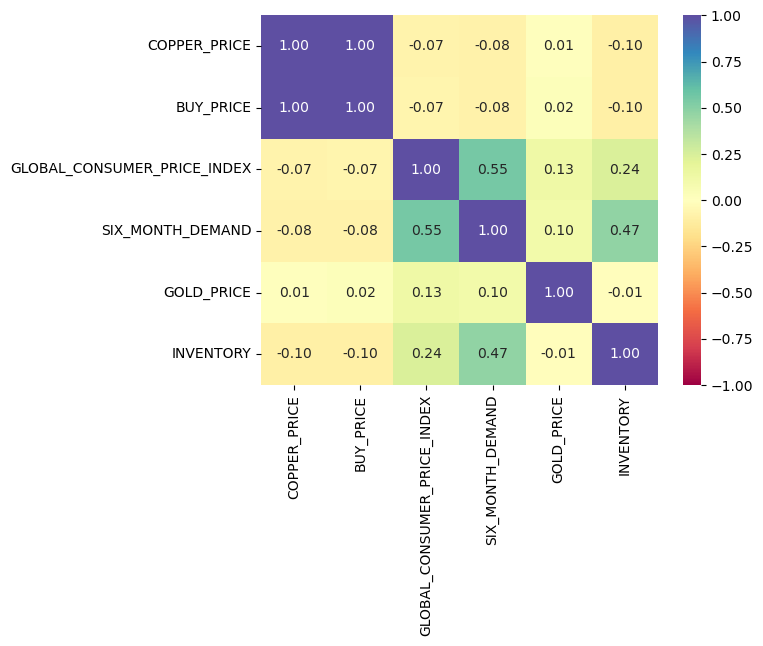

In [22]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Spectral',center=0, vmin=-1, vmax=1)

### CPI increase over the years.

<Axes: xlabel='DATE'>

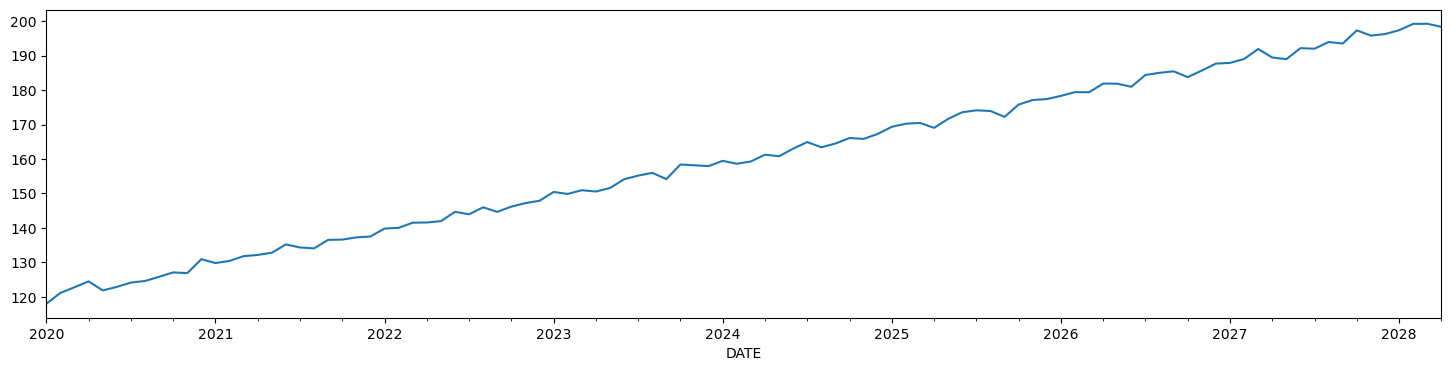

In [25]:
data['GLOBAL_CONSUMER_PRICE_INDEX'].plot(figsize=(18,4))

### Copper inventory does not have good seasonality. It is quite random. 

<Axes: xlabel='DATE'>

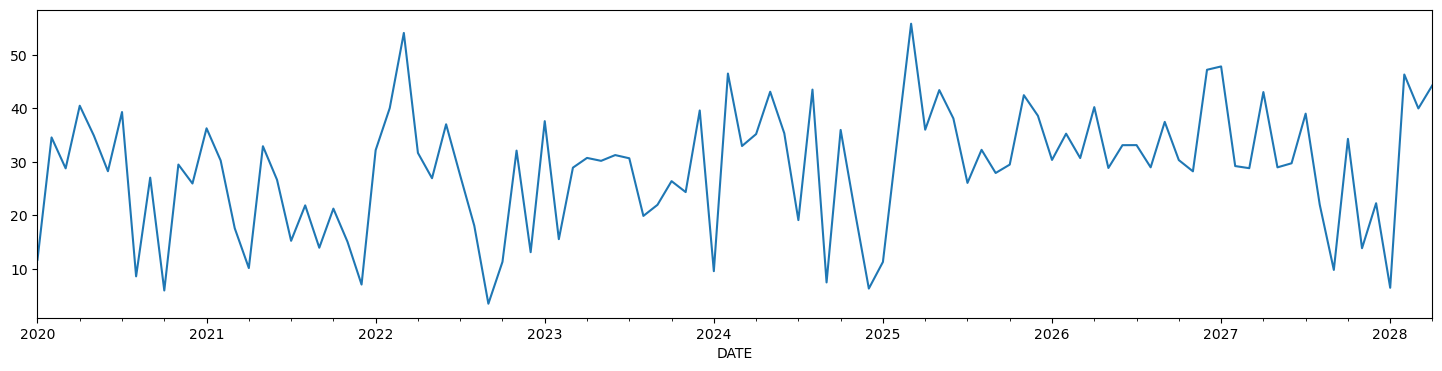

In [28]:
data['INVENTORY'].plot(figsize=(18,4))

# Seasonality

### The plot of copper demand over the years reveals a clear seasonality in the data. Demand tends to increase toward the end of the year, reaching its peak at the beginning of the following year, before gradually decreasing throughout the rest of the year.

<Axes: xlabel='DATE'>

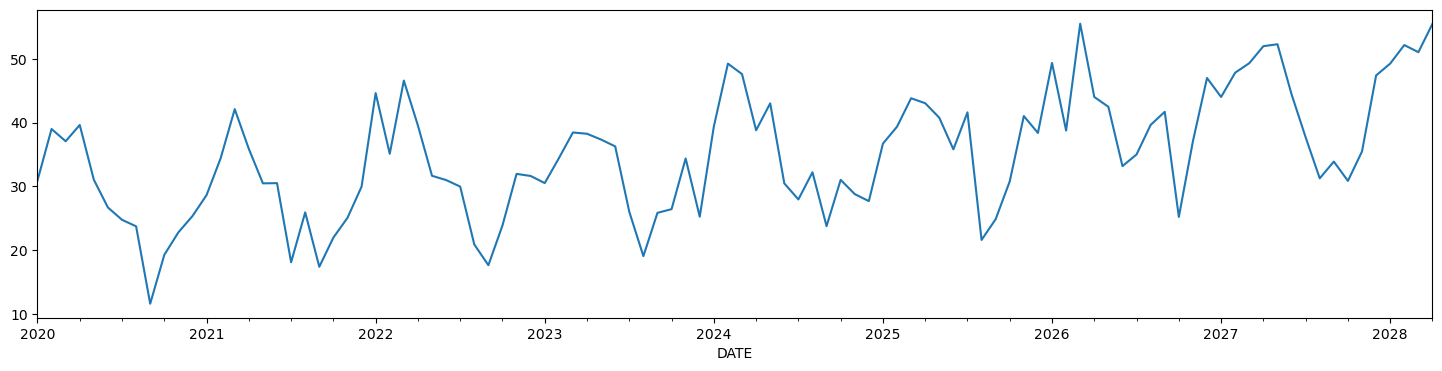

In [32]:
data['SIX_MONTH_DEMAND'].plot(figsize=(18,4))

### Seasonality in copper demand is likely driven by industrial production cycles, where companies increase activity toward the end of the year to meet deadlines and holiday demand.

# Modeling

### Time series are stationary if they have no trend or seasonal effects, others are considered non-stationary. For non-stationary time series, the SARIMAX model is best suited.

In [37]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('ADF: ', dftest[0])
    print('p-value: ', dftest[1])
    print('Num of Lags: ', dftest[2])
    print('Num of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
    print('Critical Values:')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [39]:
ad_test(data['SIX_MONTH_DEMAND'])

ADF:  -0.3011889331602887
p-value:  0.9253357748227744
Num of Lags:  11
Num of observations used for ADF Regression and Critical Values Calculation:  88
Critical Values:
	 1% :  -3.506944401824286
	 5% :  -2.894989819214876
	 10% :  -2.584614550619835


### Since the p-value is greater than 0.05, we are dealing with non-stationary time series.

### Using AUTO ARIMA, we automatically select the best parameters for the model.

In [43]:
from pmdarima import auto_arima

In [45]:
results = auto_arima(data['SIX_MONTH_DEMAND'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, 
                     error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=638.182, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=595.261, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=621.201, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=589.038, Time=0.33 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=608.297, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=577.693, Time=0.50 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=581.588, Time=0.25 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=572.702, Time=0.59 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, Time=1.29

### The optimal parameters for the model are ARIMA(0,1,1)(1,1,1)[12], where the second set of brackets represents the seasonal component. These parameters will be used to construct the model.

In [48]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data['SIX_MONTH_DEMAND'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

C:\Users\Iwka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Iwka\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Testing the model on data from 2025.

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2025-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [53]:
pred_ci['Predicted'] = (pred_ci['lower SIX_MONTH_DEMAND'] + pred_ci['upper SIX_MONTH_DEMAND'])/2
pred_ci['Observed'] = data['SIX_MONTH_DEMAND']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(5)

,lower SIX_MONTH_DEMAND,upper SIX_MONTH_DEMAND,Predicted,Observed,"Diff, %%"
2027-12-01,29.850368,49.742135,39.796251,47.405890,-16.052095
2028-01-01,39.333171,59.215028,49.274099,49.262588,0.023368
2028-02-01,38.211802,58.089547,48.150674,52.169598,-7.703575
2028-03-01,46.546156,66.420184,56.483170,51.048567,10.645945
2028-04-01,40.069440,59.940108,50.004774,55.501187,-9.903235


<Axes: xlabel='DATE'>

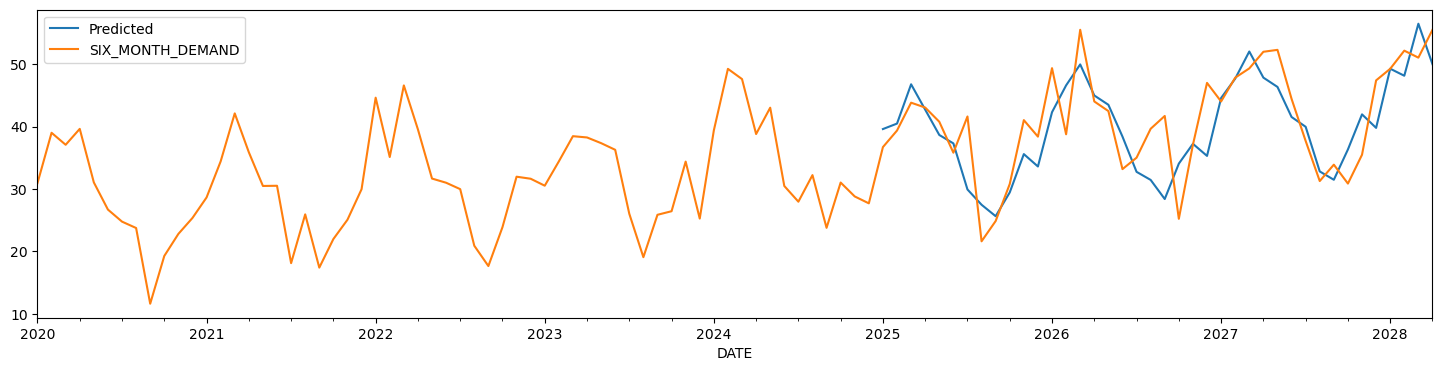

In [55]:
pred_ci['Predicted'].plot(legend=True, figsize=(18,4))
data['SIX_MONTH_DEMAND'].plot(legend=True, figsize=(18,4))

### Forecast 12 months ahead.

In [58]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

In [60]:
pred_ci

,lower SIX_MONTH_DEMAND,upper SIX_MONTH_DEMAND
2028-05-01,38.727634,58.595260
2028-06-01,32.242285,52.130011
2028-07-01,31.512560,51.420364
2028-08-01,28.103785,48.031647
2028-09-01,27.946844,47.894744
2028-10-01,25.916612,45.884531
2028-11-01,33.624379,53.612297
2028-12-01,35.708941,55.716842
2029-01-01,40.902079,60.930865
2029-02-01,41.382377,61.431074


### Predicted values shows observed earlier seasonality, which means the forecast is probably accurate.

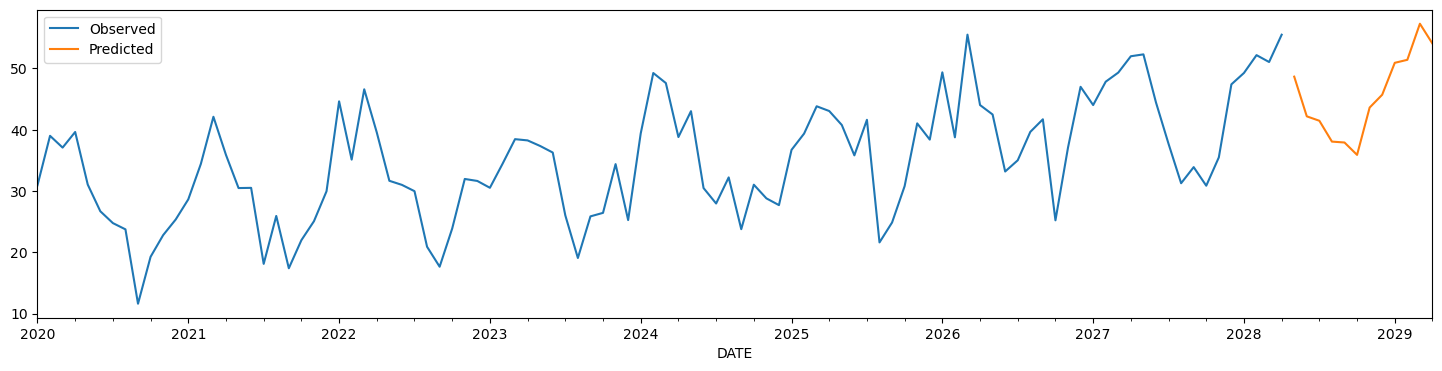

In [62]:
import matplotlib.pyplot as plt

ax = data['SIX_MONTH_DEMAND'].plot(label='Observed', figsize=(18, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted')

plt.xlabel('DATE')
plt.legend()
plt.show()

In [64]:
pred_ci.head(12)

,lower SIX_MONTH_DEMAND,upper SIX_MONTH_DEMAND
2028-05-01,38.727634,58.595260
2028-06-01,32.242285,52.130011
2028-07-01,31.512560,51.420364
2028-08-01,28.103785,48.031647
2028-09-01,27.946844,47.894744
2028-10-01,25.916612,45.884531
2028-11-01,33.624379,53.612297
2028-12-01,35.708941,55.716842
2029-01-01,40.902079,60.930865
2029-02-01,41.382377,61.431074


Text(0.5, 0, 'DATE')

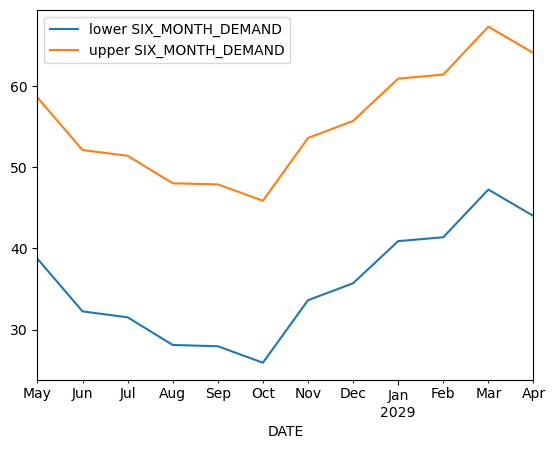

In [66]:
pred_ci.head(12).plot()
plt.xlabel('DATE')

### Average of the lower and upper results.

In [69]:
pred_ci['Mean SIX_MONTH_DEMAND'] = (pred_ci['lower SIX_MONTH_DEMAND'] + pred_ci['upper SIX_MONTH_DEMAND'])/2

In [71]:
pred_ci['Mean SIX_MONTH_DEMAND'].head(12)

2028-05-01    48.661447
2028-06-01    42.186148
2028-07-01    41.466462
2028-08-01    38.067716
2028-09-01    37.920794
2028-10-01    35.900571
2028-11-01    43.618338
2028-12-01    45.712891
2029-01-01    50.916472
2029-02-01    51.406725
2029-03-01    57.293928
2029-04-01    54.048306
Freq: MS, Name: Mean SIX_MONTH_DEMAND, dtype: float64

Text(0.5, 0, 'DATE')

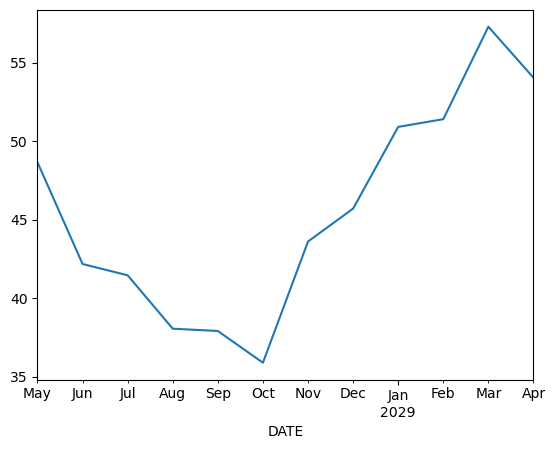

In [73]:
pred_ci['Mean SIX_MONTH_DEMAND'].head(12).plot()
plt.xlabel('DATE')

## Prediction result of copper's demand for May 2028: 48.66